In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Project 3 - Tree Data Structure Analysis

##  1. Introduction

Project 3 requires students to analyze three simple data structures: the Splay Tree, Adelson-Velsky and Landis (AVL) Tree, and Binary Tree. The base class applications.h used in these data structures for this lab experiment can be found in the appendix. The Applications base class loads Google Play Store meta data from a .csv file available at https://www.kaggle.com. This file contains n=10,843 meta data objects, while the total number of applications available on Google Play Store is currently 2.8 million. So, this file is a small fraction (0.004\%) of the total applications meta data stored on Google's servers. For the purposes of this lab experiment a small fraction of the Google Play Store applications meta data is enough to discover emergent properties within the three selected tree data structures.

### Splay Tree

The Splay Tree data structure uses the property of localization to speed up recurrent search times. Given that the tree contains n objects, searching for an object in a Splay Tree in the best case scenario takes O(1), which is equivalent to finding the object at the root node. On average searching for an object in a Splay Tree takes O(log(n)), which is a depth approximately equal to log(n). Due to the fact that Splay Trees can become unbalanced, the worst case search time is O(n), where n is the number of objects. However, when the number of objects is large the chances of creating the worst case scenario decreases exponentially. The primary use case for a Splay Tree is when the same object is requested repeatedly, which means the search time for finding the object the first time is O(log(n)). If the next search is the same object, then the search time is O(1).

### Adelson-Velsky and Landis Tree

The first tree in this lab experiment is the Splay Tree, which uses the localization property to speed up recurrent search times. Given that the tree contains n objects, searching for an object in a Splay Tree in the best case scenario takes O(1), which is equivalent to finding the object at the root node (depth = 0). On average searching for an object in a Splay Tree takes O(log(n)), which is a depth approximately equal to log(n). Due to the fact that Splay Trees can become unbalanced, the worst case search time is O(n), where n is the number of objects. However, when the number of objects is large the chances of creating this worst case scenario decreases exponentially. The primary use case for a Splay Tree is when the same object is requested repeatedly, which means the search time for finding the object the first time is O(log(n)). If the next search is the same object, then the search time is O(1). The implementation for this data structure (SplayTree.h) was live coded by Professor Lisa Dion with suggestions from students in the Fall 2019, CS124 - Data Structures and Algorithms course at the University of Vermont.

### Binary Tree (Naive)

The Binary Tree is the simplest tree data structure. The only function it maintains is the Binary Search Tree ordering property, which reduces average search time to O(log(n)) for all trees of this class. In the best case the search time is O(1) and in the worst case O(n). Due to its simplicity, the Binary Tree is vulnerable to becoming unbalanced. However, probability theory states that the larger a binary tree is, the less vulnerable it is to the worst case O(n) run time.

## 2. Procedure

1. Store n custom data objects in a vector, where the number of objects n >= 1000.
2. Create at least integers [0 - n-1] in sequence, in a random order, and repeats each integer 5 times [0, 0, 0, 0, 0, 1 ... , n-2, n-1 , n-1 , n-1 , n-1, n-1]
3. Store the objects in the trees mentioned above.
4. Overload the <, >, and == operator for your custom class.
5. Pass by reference the integer depth initialized at -1, increment the value upon entering the find function, increment the value upon traversing a new depth in the tree.
6. Store the depth value and reset its value to -1.
7. Search for objects from the original vector using the different integer lists generated
8. Plot graphs of the search depths for each tree above. Do the properties of each data structure appear as emergent properties in the graphed data? Yes. See Analysis Section.
9. Create three benign objects in your vector and describe what happens when searching for these objects.
10. Cite all code and idea sources.

## 3. Data

The following graphs collate 10843 node search requests for the Splay Tree (yellow), AVL Tree (green), and Splay Tree (Blue).

In [94]:
df = pd.read_csv("TreeSearchData.csv", header = None, skiprows=1)
df = df.drop(columns={13})
df.columns=['ID', 'Splay Tree Integer Sequence', 'AVL Tree Integer Sequence', 'Binary Tree Integer Sequence', 'Splay Tree Random Sequence', 'AVL Tree Random Sequence', 'Binary Tree Random Sequence', 'Splay Tree Duplicate Integer Sequence', 'AVL Tree Duplicate Integer Sequence', 'Binary Tree Duplicate Integer Sequence', 'Splay Tree Prime Integer Sequence', 'AVL Tree Prime Integer Sequence', 'Binary Tree Prime Integer Sequence']
df

,ID,Splay Tree Integer Sequence,AVL Tree Integer Sequence,Binary Tree Integer Sequence,Splay Tree Random Sequence,AVL Tree Random Sequence,Binary Tree Random Sequence,Splay Tree Duplicate Integer Sequence,AVL Tree Duplicate Integer Sequence,Binary Tree Duplicate Integer Sequence,Splay Tree Prime Integer Sequence,AVL Tree Prime Integer Sequence,Binary Tree Prime Integer Sequence
0,0,1,3,0,11,14,11,1,3,0,2,8,2
1,1,2,1,1,16,11,17,3,3,0,1,5,1
2,2,4,8,2,14,12,15,3,3,0,5,2,4
3,3,2,5,1,21,13,18,2,3,0,2,2,2
4,4,7,7,3,21,12,22,2,3,0,2,4,3
5,5,4,2,4,10,12,11,7,1,1,4,8,6
6,6,5,3,3,22,14,20,2,1,1,5,8,7
7,7,1,2,2,15,11,14,1,1,1,8,8,4
8,8,5,7,2,16,10,13,2,1,1,5,12,5
9,9,9,13,3,15,13,17,2,1,1,8,2,5


Compute the average search time for each instance:

In [95]:
data = df[['Splay Tree Integer Sequence', 'AVL Tree Integer Sequence', 'Binary Tree Integer Sequence', 'Splay Tree Random Sequence', 'AVL Tree Random Sequence', 'Binary Tree Random Sequence', 'Splay Tree Duplicate Integer Sequence', 'AVL Tree Duplicate Integer Sequence', 'Binary Tree Duplicate Integer Sequence', 'Splay Tree Prime Integer Sequence', 'AVL Tree Prime Integer Sequence', 'Binary Tree Prime Integer Sequence']] > 0
print(df[data].mean(axis=0))
meanList = df[data].mean(axis=0)
print(df[data].std(axis=0))
print(df[data].min(axis=0))
print(df[data].max(axis=0))

ID                                              NaN
Splay Tree Integer Sequence               15.310176
AVL Tree Integer Sequence                 11.470111
Binary Tree Integer Sequence              14.739852
Splay Tree Random Sequence                15.732544
AVL Tree Random Sequence                  12.107364
Binary Tree Random Sequence               15.969047
Splay Tree Duplicate Integer Sequence      4.964767
AVL Tree Duplicate Integer Sequence       10.125300
Binary Tree Duplicate Integer Sequence    11.861690
Splay Tree Prime Integer Sequence         15.535664
AVL Tree Prime Integer Sequence           11.359441
Binary Tree Prime Integer Sequence        14.607692
dtype: float64
ID                                             NaN
Splay Tree Integer Sequence               4.696934
AVL Tree Integer Sequence                 1.721882
Binary Tree Integer Sequence              3.905215
Splay Tree Random Sequence                4.711512
AVL Tree Random Sequence                  1.389669
Bin

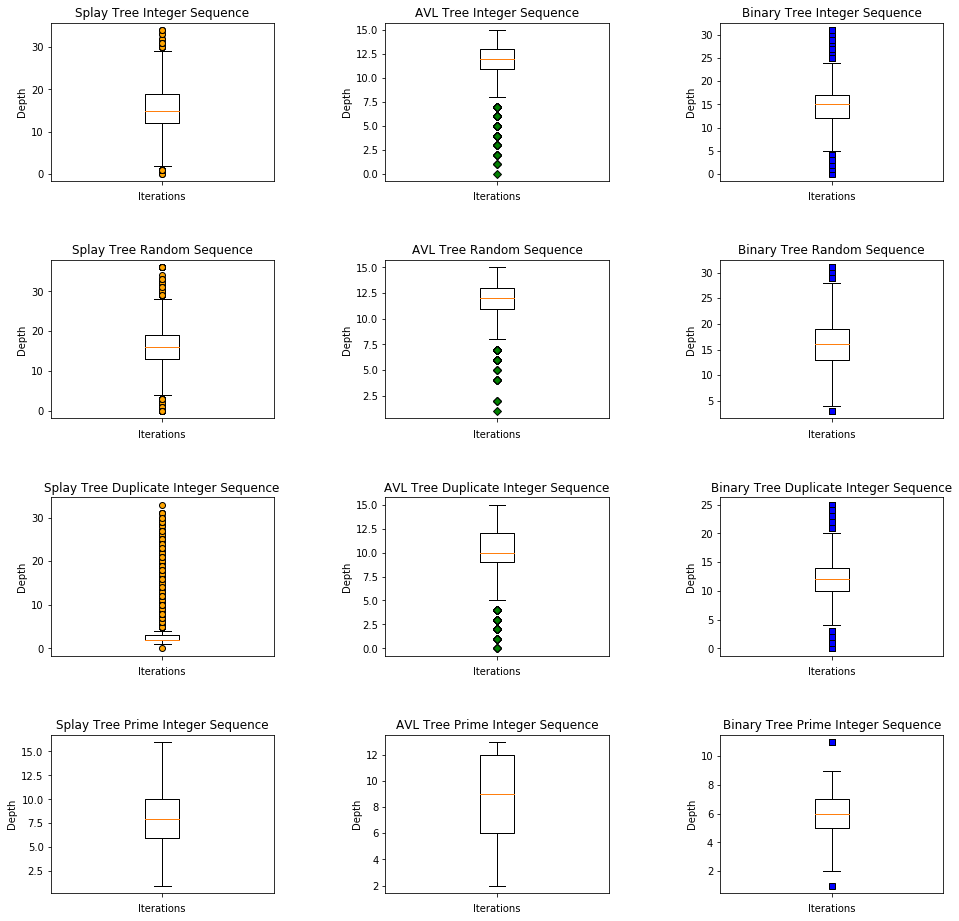

In [300]:
fig, axes = plt.subplots(4, 3, figsize=(16,16))
fig.subplots_adjust(wspace = 0.5, hspace = 0.5)
cols = ['Splay Tree Integer Sequence', 'AVL Tree Integer Sequence', 'Binary Tree Integer Sequence', 'Splay Tree Random Sequence', 'AVL Tree Random Sequence', 'Binary Tree Random Sequence', 'Splay Tree Duplicate Integer Sequence', 'AVL Tree Duplicate Integer Sequence', 'Binary Tree Duplicate Integer Sequence', 'Splay Tree Prime Integer Sequence', 'AVL Tree Prime Integer Sequence', 'Binary Tree Prime Integer Sequence']
data = df[cols] > 0
data = df[data]
color = 'black'
marker = 'O'
for i in range(4):
    for j in range(3):
        column = 3*(i)+(j)
        if(j == 0):
            color = 'orange'
            marker = 'o'
        elif(j == 1):
            color = 'green'
            marker = 'D'
        else:
            color = 'blue'
            marker = 's'
        symbol = dict(markerfacecolor=color, marker=marker)
        col = df[cols[column]].tolist()
        maxVal = df[cols[column]].max()
        flatten = np.array(col)
        if(column < 9):
            flatten = np.where(flatten < 0, maxVal, flatten)
        else:
            temp = flatten.tolist()
            flatten = list()
            for k in temp:
                if temp[k] > 0:
                    flatten = np.append(flatten,temp[k])
        axes[i, j].boxplot(flatten, flierprops = symbol)
        axes[i, j].set_title(cols[column])
        axes[i, j].set_xlabel('Iterations')
        axes[i, j].set_ylabel('Depth')
        axes[i, j].set_xticklabels('')

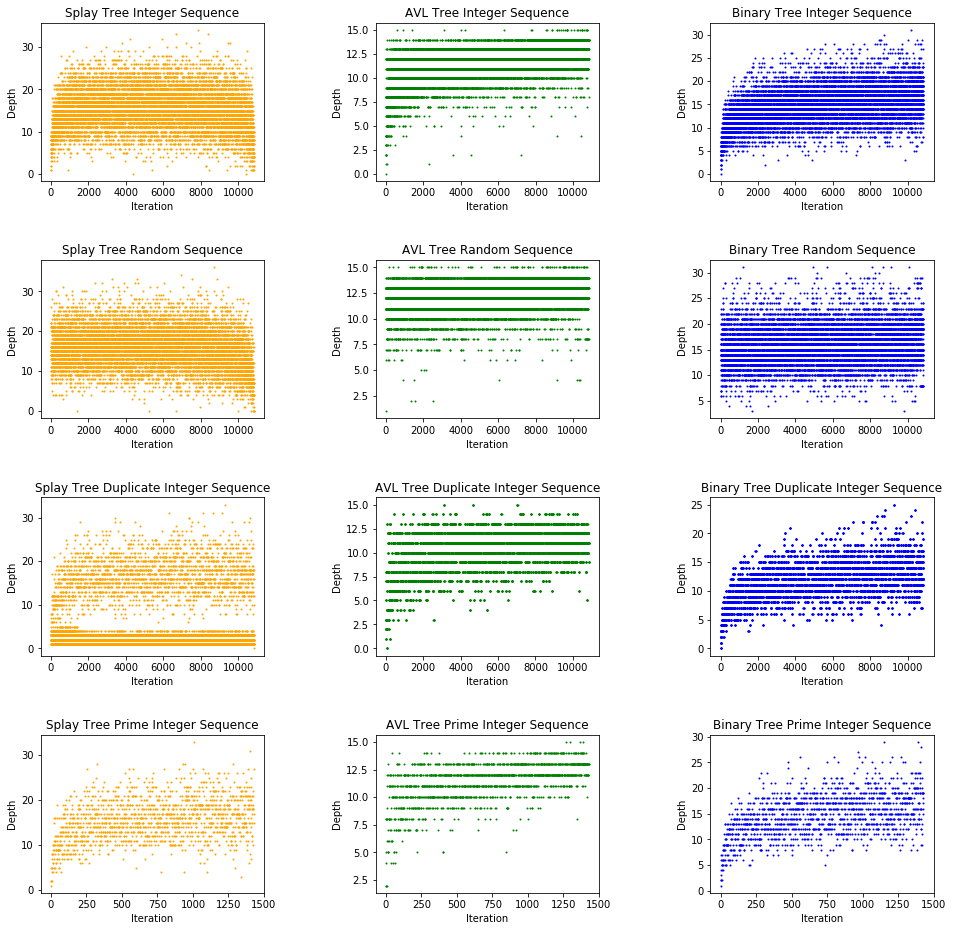

In [306]:
# Creates 12 subplots and unpack the output array immediately
fig, axes = plt.subplots(4, 3, figsize=(16,16))
fig.subplots_adjust(wspace = 0.5, hspace = 0.5)
color = 'black'
column = 0
cdata = df >= 0
cdata = df[cdata]
for i in range(4):
    for j in range(3):
        column = 3*(i)+(j)+1
        if(j == 0):
            color = 'orange'
        elif(j == 1):
            color = 'green'
        else:
            color = 'blue'
        axes[i, j].scatter(cdata.iloc[:,0], cdata.iloc[:,column], s = 1, c = color)
        axes[i, j].set_title(df.columns[column])
        axes[i, j].set_xlabel('Iteration')
        axes[i, j].set_ylabel('Depth')

## 4. Analysis

### Splay Tree

The first emergent property is in the Splay Tree Duplicate Integer Sequence graph. Since the Splay Tree uses the property of localization to improve search time for recurrent requests, the duplicate integer sequence contains exactly 4/5 O(1) item requests at depth = 0. Many other requests are at values very near the top of the tree, where depth = 1, 2, 3, and 4. This localization property diminshes at a depth = 5. The remaining searches are scattered between depths of log(n) to 3 * log(n), where n = 10,843 objects. Thus, log(n) = 13.4. The worst case search depth for the Splay Tree in the integer sequence, random sequence, and prime sequence were at a depth = 34. This is the worst case search time for all of the Trees.

### AVL Tree

Otherwise, dispersion is uniform across the integer and random sequence searches. Prime integers are sparse so it is important to note that for every tree data structure they demonstrate search times approaching worst case conditions without intentionally creating the worst case condition.
The AVL Tree operates robustly on every integer sequence and it maintains a maximum depth 15≈log(n) due to the height ordering property.

### Binary Tree

The Binary Tree demonstrates the value of using the Binary Tree ordering property as a data structure in that search depths in this lab experiment did not increase beyond 3 * log(n). However, the Binary Search Tree performs worse than the AVL Tree obtaining a maxmium search depth = 31. When compared to the Splay Trees worst case performance of depth = 34, the Binary Search Tree beats the Splay tree.

## 5. Conclusion

This experiment demonstrates empirically the emergent mathematical properties of the three chosen tree data structures. The Splay Tree is best suited for problems involving information locality, and where available memory is at a premium. The AVL tree is best suited when memory and performance are a priority. The Binary Tree should not be used other than as an intellectual exercise to begin learning about Tree Data Structures. Like Bubble Sort some ideas are meant to teach best practices through object lessons.

## 6. Bibliography

1. Kaggle: Your Home for Data Science. https://www.kaggle.com/. Accessed 24 Oct. 2019.
2. Atkin, A. O. L., and D. J. Bernstein. “Prime Sieves Using Binary Quadratic Forms.” Mathematics of Computation, vol. 73, no. 246, Dec. 2003, pp. 1023–31. Crossref, doi:10.1090/S0025-5718-03-01501-1.
3. OpenMP Exercise. https://computing.llnl.gov/tutorials/openMP/exercise.html. Accessed 24 Oct. 2019.

## 7. Appendix

### A. GooglePlayApps Source Code - Project 3

#### A.1 Applications.h by Justin Adams

/***************************************************************************************/
/** LICENSE
* Begin license text.
*
* Copyright <24 October 2019> <Justin  C. Adams>
* Permission is hereby granted, free of charge, to any person obtaining
* a copy of this software and associated documentation files (the "Software"),
* to deal in the Software without restriction, including without limitation the
* rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
* copies of the Software, and to permit persons to whom the Software is furnished
* to do so, subject to the following conditions:
*
* The above copyright notice and this permission notice shall be included in all
* copies or substantial portions of the Software.
*
* THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED,
* INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A
* PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT
* HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION
* OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE
* SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.
*
* End license text.
*/
/***************************************************************************************/
/** COPYRIGHT
* Begin copyright text.
*
* Created by Justin C. Adams 18 October 2019
* FILE: Algorithms.cpp
* DESCRIPTION:
*     Contains all data structures and algorithms implemented by Justin C. Adams
*     during the course of days working on computer programming. Implementation is
*     modified to incorporate Open Source Multi-Processing from OpenMP Architecture
*     Review Board.
*
* End copyright text.
*/
/***************************************************************************************/
/** IMPLEMENTATION & STYLE
* Begin implementation text
*
* IMPLEMENTATION
* Code implementation uses OpenMP compiler contained in CygWin64 or MSys64/MinGW64
* https://www.math.ucla.edu/~wotaoyin/windows_coding_cygwin.html
* https://www.math.ucla.edu/~wotaoyin/windows_coding.html
*
* STYLE
* Code style based on David Blaise omp_hello.c
* FILE: omp_hello.c
* DESCRIPTION:
*   OpenMP Example - Hello World - C/C++ Version
*   In this simple example, the master thread forks a parallel region.
*   All threads in the team obtain their unique thread number and print it.
*   The master thread only prints the total number of threads.  Two OpenMP
*   library routines are used to obtain the number of threads and each
*   thread's number.
* AUTHOR: Blaise Barney  5/99
* LAST REVISED: 04/06/05
*
* End implementation text
*/
/***************************************************************************************/

#ifndef GOOGLEPLAYAPPS_APPLICATIONS_H
#define GOOGLEPLAYAPPS_APPLICATIONS_H

#include <string>
#include <vector>
#include <iostream>
#include <fstream>
#include <iomanip>
#include <sstream>

using namespace std;

class Applications {
private:

    string name;
    string category;
    float rating{};
    string reviews;
    string size;
    int installs{};
    string type;
    float price{};
    string contentRating;
    string genre;
    string lastUpdated;
    string currentVer;
    string androidVer;

public:

    // Default Constructor
    Applications() {
        this->name = "Outdoor Adventure";
        this->category = "Offline";
        this->rating = 5.0;
        this->reviews = "0";
        this->size = "0M";
        this->installs = 0;
        this->type = "Free?";
        this->price = 0.00;
        this->contentRating = "Everyone";
        this->genre = "Pick your own adventure";
        this->lastUpdated = "Right";
        this->currentVer = "???";
        this->androidVer = "9.0";
    }

    // Copy constructor
    Applications(const Applications &apps) {
        this->name = apps.name;
        this->category = apps.category;
        this->rating = apps.rating;
        this->reviews = apps.reviews;
        this->size = apps.size;
        this->installs = apps.installs;
        this->type = apps.type;
        this->price = apps.price;
        this->contentRating = apps.contentRating;
        this->genre = apps.genre;
        this->lastUpdated = apps.lastUpdated;
        this->currentVer = apps.currentVer;
        this->androidVer = apps.androidVer;
    }

    Applications(string &appName, string &appCategory, float &appRating, string &appReviews, string &appSize, int &appInstalls, string &appType, float &appPrice, string &appContentRating, string &appGenres, string &appLastUpdated, string &appCurrentVer, string &appAndroidVer) {
        this->name = appName;
        this->category = appCategory;
        this->rating = appRating;
        this->reviews = appReviews;
        this->size = appSize;
        this->installs = appInstalls;
        this->type = appType;
        this->price = appPrice;
        this->contentRating = appContentRating;
        this->genre = appGenres;
        this->lastUpdated = appLastUpdated;
        this->currentVer = appCurrentVer;
        this->androidVer = appAndroidVer;
    }

    /*
     * Requires: nothing
     * Modifies: nothing
     * Effects: Returns the application name
     */

    string getName() const {
        return this->name;
    }

    /*
     * Requires: nothing
     * Modifies: nothing
     * Effects: Returns the category name
     */

    string getCategory() const {
        return this->category;
    }

    /*
     * Requires: nothing
     * Modifies: nothing
     * Effects: Returns the application rating
     */

    float getRating() const {
        return this->rating;
    }

    /*
     * Requires: nothing
     * Modifies: nothing
     * Effects: Returns the number of reviews
     */

    string getReviews() const {
        return this->reviews;
    }

    /*
     * Requires: nothing
     * Modifies: nothing
     * Effects: Returns the file size
     */

    string getSize() const {
        return this->size;
    }

    /*
     * Requires: nothing
     * Modifies: nothing
     * Effects: Returns the number of installations
     */

    int getInstalls() const {
        return this->installs;
    }

    /*
     * Requires: nothing
     * Modifies: nothing
     * Effects: Returns the type of application license
     */

    string getType() const {
        return this->type;
    }

    /*
     * Requires: nothing
     * Modifies: nothing
     * Effects: Returns the application price
     */

    float getPrice() const {
        return this->price;
    }

    /*
     * Requires: nothing
     * Modifies: nothing
     * Effects: Returns the content rating for the application
     */

    string getContentRating() {
        return this->contentRating;
    }

    /*
     * Requires: nothing
     * Modifies: nothing
     * Effects: Returns the genre of the application
     */

    string getGenre() {
        return this->genre;
    }

    /*
     * Requires: nothing
     * Modifies: nothing
     * Effects: Returns the date the application was updated
     */

    string getLastUpdated() {
        return this->lastUpdated;
    }

    /*
     * Requires: nothing
     * Modifies: nothing
     * Effects: Returns the current version of the application
     */

    string getCurrentVersion() {
        return this->currentVer;
    }

    /*
     * Requires: nothing
     * Modifies: nothing
     * Effects: Returns the android version the application is designed for
     */

    string getAndroidVersion() {
        return this->androidVer;
    }

    /*
     * Requires: @param appName - String containing the new name for the application
     * Modifies: @field app - String containing the old name of the application
     * Effects: Sets the application name
     */

    void setName(string &appName){
        this->name = appName;
    }

    /*
     * Requires: @param appCategory - String containing the new category for the application
     * Modifies: @field category - String containing the old category of the application
     * Effects: Sets the application category
     */

    void setCategory(string &appCategory){
        this->category = appCategory;
    }

    /*
     * Requires: @param appRating - String containing the new rating value for the application
     * Modifies: @field rating - String containing the old rating of the application
     * Effects: Sets the application rating
     */

    void setRating(float &appRating) {
        this->rating = appRating;
    }

    /*
     * Requires: @param appReviews - String containing the new number for application reviews
     * Modifies: @field reviews - String containing the old number of application reviews
     * Effects: Sets the application reviews
     */

    void setReviews(string &appReviews) {
        this->reviews = appReviews;
    }

    /*
     * Requires: @param appSize - String containing the new file size of the application
     * Modifies: @field size - String containing the old application size
     * Effects: Sets the application file size
     */

    void setSize(string &appSize){
        this->size = appSize;
    }

    /*
     * Requires: @param appReviews - String containing the new number of application installs
     * Modifies: @field rating - String containing the old number of application installs
     * Effects: Sets the number of installations
     */

    void setInstalls(int &appInstalls){
        this->installs = appInstalls;
    }

    /*
     * Requires: @param appReviews - String containing the license of the application
     * Modifies: @field rating - String containing the license of the application
     * Effects: Sets the application license
     */


    void setType(string &appType){
        this->type = appType;
    }

    /*
     * Requires: @param appReviews - String containing the price of the application
     * Modifies: @field rating - String containing the price of the application
     * Effects: Sets the application price
     */

    void setPrice(float &appPrice){
        this->price = appPrice;
    }

    /*
     * Requires: @param appContentRating - String containing the new content rating of the application
     * Modifies: @field rating - String containing the old content rating of the application
     * Effects: Sets the application rating
     */

    void setContentRating(string &appContentRating) {
        this->contentRating = appContentRating;
    }

    /*
     * Requires: @param appGenre - String containing the new genre of the application
     * Modifies: @field appGenre - String containing the old genre of the application
     * Effects: Sets the application genre
     */

    void setGenre(string &appGenre) {
        this->genre = appGenre;
    }

    /*
     * Requires: @param appUpdated - String containing the new update date
     * Modifies: @field lastUpdated - String containing the last time the application was updated
     * Effects: Sets the application update date
     */

    void setLastUpdated(string &appUpdated) {
        this->lastUpdated = appUpdated;
    }

    /*
     * Requires: @param appUpdated - String containing the new application version number (int.int.int...etc format)
     * Modifies: @field lastUpdated - String containing the old application version number
     * Effects: Sets the application version number
     */

    void setCurrentVersion(string &appVersion) {
        this->currentVer = appVersion;
    }

    /*
     * Requires: @param appUpdated - String containing the new android version number (int.int.int...etc format)
     * Modifies: @field lastUpdated - String containing the old android version number
     * Effects: Sets the android version number
     */

    void setAndroidVersion(string &appAndroidVer) {
        this->androidVer = appAndroidVer;
    }

    /*
     *  Requires:   @param &lhs - Appplication to compare in less than equality operator.
     *              @param &rhs - Application to compare in less than equality operator.
     *  Modifies:   nothing
     *  Effects:    Returns true if the left hand side application name appears first alphabetically.
     */

    bool friend operator < (const Applications &lhs, const Applications &rhs) {
        return (lhs.getName() < rhs.getName());
    }

    /*
     *  Requires:   @param &lhs - Appplication to compare in less than equality operator.
     *              @param &rhs - Application to compare in less than equality operator.
     *  Modifies:   nothing
     *  Effects:    Returns true if the right hand side application name appears first alphabetically.
     */

    bool friend operator > (const Applications &lhs, const Applications &rhs) {
        return (lhs.getName() > rhs.getName());
    }

    /*
     *  Requires:   @param &lhs - Appplication to compare in less than equality operator.
     *              @param &rhs - Application to compare in less than equality operator.
     *  Modifies:   nothing
     *  Effects:    Returns true if the left hand side application name appears first alphabetically.
     */

    bool friend operator == (const Applications &lhs, const Applications &rhs) {
        return (lhs.getName() == rhs.getName());
    }

    /*
     * Requires: @param appUpdated - String containing the new android version number (int.int.int...etc format)
     * Modifies: @field lastUpdated - String containing the old android version number
     * Effects: Sets the android version number
     */

    friend ostream& operator << (ostream &travelingSalesman, Applications app) {
        travelingSalesman << setw(22) << app.getName().substr(0,20);
        travelingSalesman << setw(15) << app.getCategory().substr(0, 13);
        travelingSalesman << setw(8) << app.getRating();
        travelingSalesman << setw(8) << app.getReviews();
        travelingSalesman << setw(5) << app.getSize();
        travelingSalesman << setw(10) << app.getInstalls();
        travelingSalesman << setw(10) << app.getType();
        travelingSalesman << setw(6) << app.getPrice();
        travelingSalesman << setw(10) << app.getContentRating().substr(0, 8);
        travelingSalesman << setw(6) << app.getGenre().substr(0, 4);
        travelingSalesman << setw(9) << app.getLastUpdated();
        travelingSalesman << setw(5) << app.getCurrentVersion().substr(0, 3);
        travelingSalesman << setw(5) << app.getAndroidVersion().substr(0, 3);
        travelingSalesman << endl;
        return travelingSalesman;
    }
};

    /*
    * Requires: @param vector<Applications> applications - Vector passed by reference from main function to encapsulate app data.
    * Modifies: nothing
    * Effects: Calculates the value of an application based on price, installs, and rating.
    */

    vector<float> applicationValueCalculator(vector<Applications> &applications) {
        vector<float> appValue;
        float price;
        float applicationValue;
        for(Applications app : applications) {
            price = app.getPrice();
            if(price <= 0) {
                applicationValue = app.getInstalls()*app.getRating();
            }
            else {
                applicationValue = app.getInstalls()*app.getRating()/price*100;
            }
            appValue.emplace_back(applicationValue);
            cout << "Application: " << setw(20) << app.getName().substr(0,20) << "Calculated Value (Installs*Rating/Price): " << applicationValue << endl;
        }
        return appValue;
    }


    /*
    * Requires: @param &fileName - String containing filename to access in the parent directory,
    *           @param vector<Applications> applications - Vector passed by reference from main function to encapsulate app data.
    * Modifies: @field allfields - App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
    * Effects: Creates and stores application data
    */

void readApplicationsFromFile(string &fileName, vector<Applications> &applications) {
        string applicationName;
        string categoryName;
        float applicationRating;
        string applicationReviews;
        string fileSize;
        int applicationInstalls;
        string applicationType;
        float applicationPrice;
        string applicationContentRating;
        string applicationGenre;
        string applicationLastUpdated;
        string currentVersion;
        string androidVersion;
        string header;
        char comma;
        string error;

        ifstream appStream;

        appStream.open("../" + fileName);


        getline(appStream, header);

        while(appStream && appStream.peek() != EOF) {
            getline(appStream, applicationName, ',');
            if(!appStream){
                appStream >> error;
                cout << error;
            }
            getline(appStream, categoryName, ',');
            if(!appStream){
                appStream >> error;
                cout << error;
            }
            appStream >> applicationRating;
            appStream >> comma;
            if(!appStream){
                appStream >> error;
                cout << error;
            }
            getline(appStream, applicationReviews, ',');
            getline(appStream, fileSize, ',');
            if(!appStream){
                appStream >> error;
                cout << error;
            }
            appStream >> applicationInstalls;
            appStream >> comma;
            if(!appStream){
                appStream >> error;
                cout << error;
            }
            getline(appStream, applicationType, ',');
            if(!appStream){
                appStream >> error;
                cout << error;
            }
            appStream >> applicationPrice;
            appStream >> comma;
            if(!appStream){
                appStream >> error;
                cout << error;
            }
            getline(appStream, applicationContentRating, ',');
            if(!appStream){
                appStream >> error;
                cout << error;
            }
            getline(appStream, applicationGenre, ',');
            if(!appStream){
                appStream >> error;
                cout << error;
            }
            getline(appStream, applicationLastUpdated, ',');
            if(!appStream){
                appStream >> error;
                cout << error;
            }
            getline(appStream, currentVersion, ',');
            if(!appStream){
                appStream >> error;
                cout << error;
            }
            getline(appStream, androidVersion);
            if(!appStream){
                appStream >> error;
                cout << error;
            }
            applications.emplace_back(Applications(applicationName, categoryName, applicationRating, applicationReviews, fileSize, applicationInstalls, applicationType, applicationPrice, applicationContentRating, applicationGenre, applicationLastUpdated, currentVersion, androidVersion));
        }
        appStream.close();
    }

    /*
    * Requires: googleplaystore.csv in parent directory
    * Modifies: nothing
    * Effects: Tests all member functions and global functions of this class.
    */

    void testApplicationsClass() {
        string fish = "herring";
        int weight = 20;
        float value = 1.0;
        string size = "20lb";
        string date = "9/15/2008";
        cout <<  "Testing the default constructor" << endl;
        Applications newApplication;
        cout << "Testing the overloaded operator" << endl;
        cout << left << newApplication;
        cout << "Testing read file system." << endl;
        vector<Applications> testVector;
        string filename = "googleplaystore.csv";
        readApplicationsFromFile(filename, testVector);
        cout << testVector.size() << endl;
        if(testVector.size() >= 10841) {
            cout << "Test vector success. All applications from Google Play Store loaded." << endl;
        }
        else {
            cout << "Test failed. Number of applications loaded is less than 10842." << endl;
            int readInFailurPoint = testVector.size()-1;
            cout << "Loading object failure detected at line" << readInFailurPoint << endl;
        }
        cout << "Application value calculator." << endl;
        applicationValueCalculator(testVector);
        cout << "Testing getters and setters on test application with a 20 lb fish." << endl;
        newApplication.setName(fish);
        cout << "Name the " << newApplication.getName() << endl;
        newApplication.setCategory(fish);
        cout << "Category please " << newApplication.getCategory() << endl;
        newApplication.setRating(value);
        cout << "Rate the smell " << newApplication.getRating() << endl;
        newApplication.setReviews(fish);
        cout << "The reviews for your rating are in: " << newApplication.getReviews() << endl;
        newApplication.setSize(size);
        cout << "If you don't believe me get the size: " << newApplication.getSize() << endl;
        newApplication.setInstalls(weight);
        cout << "It is hard to download a fish, but you can make " << newApplication.getInstalls() << endl;
        newApplication.setType(size);
        cout << "How much sushi could a " << newApplication.getType() << endl;
        newApplication.setPrice(value);
        cout << "Pound fish fetch at market? " << newApplication.getPrice() << endl;
        newApplication.setContentRating(fish);
        cout << newApplication.getContentRating();
        newApplication.setGenre(fish);
        cout << " " << newApplication.getGenre();
        newApplication.setLastUpdated(date);
        cout << "Date purchased: " << newApplication.getLastUpdated();
        newApplication.setCurrentVersion(size);
        cout << "Fish version: " << newApplication.getCurrentVersion();
        newApplication.setAndroidVersion(size);
        cout << "Market version: " << newApplication.getAndroidVersion();
        // Output 1000+1 applications (for good measure)
        cout << setw(22) << left << "Application Name" << setw(15) << "Category" << setw(8) << "Rating" << setw(8) << "Reviews" << setw(5) << "Size" << setw(10) << "Downloads" << setw(10) << "License" << setw(6) << "Price" << setw(10) << "Content" << setw(6) << "Genre" << setw(9) << "vDate" << setw(5) << "vApp" << setw(5) << "vDroid" << endl;
        cout << setw(120) << setfill('-') << '-' << setfill(' ') << endl;
        for(int i = 0; i < 1001; i++) {
            cout << testVector[i] << endl;
        }
    }


#endif //GOOGLEPLAYAPPS_APPLICATIONS_H

#### A.2 Algorithms.h by Justin Adams

/***************************************************************************************/
/** LICENSE
* Begin license text.
*
* Copyright <24 October 2019> <Justin  C. Adams>
* Permission is hereby granted, free of charge, to any person obtaining
* a copy of this software and associated documentation files (the "Software"),
* to deal in the Software without restriction, including without limitation the
* rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
* copies of the Software, and to permit persons to whom the Software is furnished
* to do so, subject to the following conditions:
*
* The above copyright notice and this permission notice shall be included in all
* copies or substantial portions of the Software.
*
* THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED,
* INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A
* PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT
* HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION
* OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE
* SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.
*
* End license text.
*/
/***************************************************************************************/
/** COPYRIGHT
* Begin copyright text.
*
* Created by Justin C. Adams 18 October 2019
* FILE: Algorithms.cpp
* DESCRIPTION:
*     Contains all data structures and algorithms implemented by Justin C. Adams
*     during the course of days working on computer programming. Implementation is
*     modified to incorporate Open Source Multi-Processing from OpenMP Architecture
*     Review Board.
*
* End copyright text.
*/
/***************************************************************************************/
/** IMPLEMENTATION & STYLE
* Begin implementation text
*
* IMPLEMENTATION
* Code implementation uses OpenMP compiler contained in CygWin64 or MSys64/MinGW64
* https://www.math.ucla.edu/~wotaoyin/windows_coding_cygwin.html
* https://www.math.ucla.edu/~wotaoyin/windows_coding.html
*
* STYLE
* Code style based on David Blaise omp_hello.c
* FILE: omp_hello.c
* DESCRIPTION:
*   OpenMP Example - Hello World - C/C++ Version
*   In this simple example, the master thread forks a parallel region.
*   All threads in the team obtain their unique thread number and print it.
*   The master thread only prints the total number of threads.  Two OpenMP
*   library routines are used to obtain the number of threads and each
*   thread's number.
* AUTHOR: Blaise Barney  5/99
* LAST REVISED: 04/06/05
*
* End implementation text
*/
/***************************************************************************************/

#include "BinarySearchTree.h"
#include "AVLTree.h"
#include "SplayTree.h"
#include "Applications.h"


#include <random>
#include <chrono>
#include <iostream>
#include <fstream>
using namespace std;

template <typename T>
class Algorithms {
private:

    int start = 0;
    int end = 255;
    int repeats = 2;
    string filename = "../numbers.txt";
    bool verbose = false;

public:

    // Default Constructor
    /* Default constructor. This does contain any parameters. */
    Algorithms<T>() {
        /* Initialize field start to 0. */
        this->start = 0;
        /* Initialize field end to 255 (INT8_MAX = 2^8 - 1). */
        this->end = 255;
        /* Initialize field repeats to 2. */
        this->repeats = 2;
        /* Initialize string filename to "../numbers.txt". */
        this->filename = "../numbers.txt";
    }

    /*
     *  Requires:   @param start - Integer start for the beginning of array data.
     *  Modifies:   @field start - Integer start for the beginning of array data.
     *  Effects:    Algorithms initializes required parameters for all functions.
    */

    /* Integer start initialization constructor. This contains the parameter int s, which initializes start. */
    explicit Algorithms<T>(int s) {
        /* Initialize field start to s. */
        this->start = s;
        /* Initialize field end to 255 + s (INT8_MAX = 2^8 - 1 + s). */
        this->end = 255 + s;
        /* Initialize field repeats to 2. */
        this->repeats = 2;
        /* Initialize string filename to "../numbers.txt". */
        this->filename = "../numbers.txt";
    }

    /*
     *  Requires:   @param filename - String filename for the end of array data.
     *  Modifies:   @field filename - String filename for the end of array data.
     *  Effects:    Algorithms initializes required parameters for all functions.
    */

    /* String filename initialization constructor. This contains the parameter string &f, which initializes filename. */
    explicit Algorithms<T>(string &f) {
        /* Initialize field start to 0. */
        this->start = 0;
        /* Initialize field end to 255 (INT8_MAX = 2^8 - 1). */
        this->end = 255;
        /* Initialize field repeats to 2. */
        this->repeats = 2;
        /* Initialize string filename to f. */
        this->filename = f;
    }

    /*
     *  Requires:   @param start - Integer start for the beginning of array data.
     *              @param end - Integer end for the end of array data.
     *  Modifies:   nothing
     *  Effects:    Algorithms initializes required parameters for all functions.
    */

    /* Integer start and end initialization constructor.
    *  This contains the parameter int s and int e, which initializes start and end. */
    Algorithms<T>(int s, int e) {
        /* Initialize field start to s. */
        this->start = s;
        /* Initialize field end to e. */
        this->end = e;
        /* Initialize field repeats to 2. */
        this->repeats = 2;
        /* Initialize string filename to "../numbers.txt". */
        this->filename = "../numbers.txt";
    }

    /*
     *  Requires:   @param start - Integer start for the beginning of array data.
     *              @param end - Integer end for the end of array data.
     *  Modifies:   nothing
     *  Effects:    Algorithms initializes required parameters for all functions.
    */

    /* Integer start, end initialization constructor.
    *  This contains the parameter int s, int e, string &f which initializes start, end, and filename. */
    Algorithms<T>(int s, int e, string &f) {
        /* Initialize field start to s. */
        this->start = s;
        /* Initialize field end to e. */
        this->end = e;
        /* Initialize field repeats to 2. */
        this->repeats = 2;
        /* Initialize string filename to f. */
        this->filename = f;
    }

    /*
     *  Requires:   @param start - Integer start for the beginning of array data.
     *              @param end - Integer end for the end of array data.
     *              @param repeats - Integer repeats sets the number of duplicates in array data.
     *  Modifies:   nothing
     *  Effects:    Algorithms initializes required parameters for all functions.
    */

    /* Integer start, end repeats constructor.
    *  This contains the parameter int s, int e, int r which initializes start, end, and repeats. */
    Algorithms<T>(int s, int e, int r) {
        /* Initialize field start to s. */
        this->start = s;
        /* Initialize field end to e. */
        this->end = e;
        /* Initialize field repeats to r */
        this->repeats = r;
        /* Initialize string filename to "../numbers.txt". */
        this->filename = "../numbers.txt";
    }


    /*
     *  Requires:   @param start - Integer start for the beginning of array data.
     *              @param end - Integer end for the end of array data.
     *              @param repeats - Integer repeats sets the number of duplicates
     *              in array data for the duplicatesIntegerArray function.
     *              @param filename - String filename sets the file name to write array data to.
     *  Modifies:   nothing
     *  Effects:    Algorithms initializes required parameters for all functions.
    */

    /* Integer start, end, repeats, and filename constructor.
    *  This contains the parameter int s, int e, int r, and string &f.
    *  The constructor initializes start, end, repeats, and filename. */
    Algorithms<T>(int s, int e, int r, string &f) {
        /* Initialize field start to s. */
        this->start = s;
        /* Initialize field end to e. */
        this->end = e;
        /* Initialize field repeats to r */
        this->repeats = r;
        /* Initialize string filename to f. */
        this->filename = f;
    }

    /*
     *  Default Deconstructor
     */

    ~Algorithms() = default;

    /*
     *  Requires:   nothing
     *  Modifies:   nothing
     *  Effects:    Tests the Algorithms class.
    */

    /*  Atkin, A. O. L., and D. J. Bernstein. “Prime Sieves Using Binary Quadratic Forms.” Mathematics of Computation
        vol. 73, no. 246, Dec. 2003, pp. 1023–31. Crossref, doi:10.1090/S0025-5718-03-01501-1.*/
    bool testAlgorithms() {
        /** Initialize variables for the Algorithms class test suite. */

        /* Primitive data type instances. */
        /* Retrieve currentStart. */
        int currentStart = getStart();
        /* Retrieve currentEnd. */
        int currentEnd = getEnd();
        /* Retrieve currentRepeats. */
        int currentRepeats = getRepeats();
        /* Retrieve currentFilename. */
        string currentFilename = getFilename();

        /* Set testing boolean passed to true. */
        bool passed = true;
        /* Set testing integer newStart to -1. */
        int newStart = -1;
        /* Set testing integer newEnd to 256. */
        int newEnd = 256;
        /* Set testing integer newRepeats to 3. */
        int newRepeats = 3;
        /* Set testing bool newBool to true. */
        bool newBool = false;
        /* Reset verbose trigger. */
        bool resetVerbose = false;

        /* Derived data type instances. */
        /* Set newFilename to "../n.txt". */
        string newFilename = "../n.txt";
        /* Create a filename comparison string object. */
        string getFilename;
        /* Create a constant integer to initialize arrays. */
        const static int size = 257;
        /* Create an array to store an ordered sequence of integers. */
        vector<int> sequence;
        /* Create an array to store a random sequence of integers. */
        vector<int> random;
        /* Create an array to store a series of duplicate integers. */
        vector<int> duplicates;

        /** Verify getters and setters pass testing. */


        /* Check if verbose mode is on. */
        if(this->getVerbose()) {
            /* Declare to the user the current test. */
            cout << "Testing getVerbose." << endl;
            /* Set verbose mode to a value to verify testing. */
            this->setVerbose(newBool);
            /* Set reset verbose trigger. */
            resetVerbose = true;
        }
        /* Check if getVerbose is successful. */
        if(!this->getVerbose()) {
            /* Check if verbose mode is on. */
            if(resetVerbose) {
                /* Report getVerbose success. */
                cout << "getVerbose successful." << endl;
            }
        }
            /* Report getVerbose failure. */
        else {
            if(resetVerbose) {
                /* Declare to the user getVerbose failure. */
                cout << "getVerbose failure." << endl;
            }
            /* Update test status variable to false. */
            passed = false;
        }


        /* Check if verbose mode is on. */
        if(this->getVerbose()) {
            /* Declare to the user the current test. */
            cout << "Testing setVerbose." << endl;
        }
        /* Change newBool to true. */
        newBool = !newBool;
        /* Set verbose to newBool = true. */
        this->setVerbose(newBool);
        /* Check if setVerbose is successful. */
        if(this->getVerbose()) {
            /* Check if verbose mode is on. */
            if(resetVerbose) {
                /* Report setVerbose success. */
                cout << "setVerbose successful." << endl;
            }
            /* Check if resetVerbose was triggered. */
            if(!resetVerbose) {
                /* Set verbose back to original setting. */
                this->setVerbose(resetVerbose);
            }
        }
            /* Report setVerbose failure. */
        else {
            /* Declare to the user setVerbose failure. */
            cout << "setVerbose failure." << endl;
            /* Update test status variable to false. */
            passed = false;
        }



        /* Check if verbose mode is on. */
        if(this->getVerbose()) {
            /* Declare to the user the current phase of testing. */
            cout << "Testing getters and setters." << endl;
        }

        /* Check if verbose mode is on. */
        if(this->getVerbose()) {
            /* Declare to the user the current test. */
            cout << "Testing getStart." << endl;
        }
        /* Check if getStart is successful. */
        if(this->getStart() == currentStart) {
            /* Check if verbose mode is on. */
            if(this->getVerbose()) {
                /* Report getStart success. */
                cout << "getStart successful." << endl;
            }
        }
            /* Report getStart failure. */
        else {
            /* Check if verbose mode is on. */
            if(this->getVerbose()) {
                /* Declare to the user getStart failure. */
                cout << "getStart failure." << endl;
            }
            /* Update test status variable to false. */
            passed = false;
        }

        /* Check if verbose mode is on. */
        if(this->getVerbose()) {
            /* Declare to the user the current test. */
            cout << "Testing setStart." << endl;
        }
        /* Set start to newStart = -1. */
        this->setStart(newStart);
        /* Check if setStart is successful. */
        if(this->getStart() == newStart) {
            /* Check if verbose mode is on. */
            if(this->getVerbose()) {
                /* Report setStart success. */
                cout << "setStart successful." << endl;
            }
        }
            /* Report setStart failure. */
        else {
            /* Check if verbose mode is on. */
            if(this->getVerbose()) {
                /* Declare to the user setStart failure. */
                cout << "setStart failure." << endl;
            }
            /* Update test status variable to false. */
            passed = false;
        }

        /* Check if verbose mode is on. */
        if(this->getVerbose()) {
            /* Declare to the user the current test. */
            cout << "Testing getEnd." << endl;
        }
        /* Check if getEnd is successful. */
        if(this->getEnd() == currentEnd) {
            /* Check if verbose mode is on. */
            if(this->getVerbose()) {
                /* Report getEnd success. */
                cout << "getEnd successful." << endl;
            }
        }
            /* Report getEnd failure. */
        else {
            /* Check if verbose mode is on. */
            if(this->getVerbose()) {
                /* Declare to the user getEnd failure. */
                cout << "getEnd failure." << endl;
            }
            /* Update test status variable to false. */
            passed = false;
        }

        /* Check if verbose mode is on. */
        if(this->getVerbose()) {
            /* Declare to the user the current test. */
            cout << "Testing setEnd." << endl;
        }
        /* Set start to newEnd = 256. */
        this->setEnd(newEnd);
        /* Check if setEnd is successful. */
        if(this->getEnd() == newEnd) {
            /* Check if verbose mode is on. */
            if(this->getVerbose()) {
                /* Report setEnd success. */
                cout << "setEnd successful." << endl;
            }
        }
            /* Report setEnd failure. */
        else {
            /* Check if verbose mode is on. */
            if(this->getVerbose()) {
                /* Declare to the user setEnd failure. */
                cout << "setEnd failure." << endl;
            }
            /* Update test status variable to false. */
            passed = false;
        }

        /* Check if verbose mode is on. */
        if(this->getVerbose()) {
            /* Declare to the user the current test. */
            cout << "Testing getRepeats." << endl;
        }
        /* Check if getRepeats is successful. */
        if(this->getRepeats() == currentRepeats) {
            /* Check if verbose mode is on. */
            if(this->getVerbose()) {
                /* Report getRepeats success. */
                cout << "getRepeats successful." << endl;
            }
        }
            /* Report getRepeats failure. */
        else {
            /* Check if verbose mode is on. */
            if(this->getVerbose()) {
                /* Declare to the user getRepeats failure. */
                cout << "getRepeats failure." << endl;
            }
            /* Update test status variable to false. */
            passed = false;
        }

        /* Check if verbose mode is on. */
        if(this->getVerbose()) {
            /* Declare to the user the current test. */
            cout << "Testing setRepeats." << endl;
        }
        /* Set repeats to newRepeats = 3. */
        this->setRepeats(newRepeats);
        /* Check if setRepeats is successful. */
        if(this->getRepeats() == newRepeats) {
            /* Check if verbose mode is on. */
            if(this->getVerbose()) {
                /* Report setRepeats success. */
                cout << "setRepeats successful." << endl;
            }
        }
            /* Report setRepeats failure. */
        else {
            /* Check if verbose mode is on. */
            if(this->getVerbose()) {
                /* Declare to the user setRepeats failure. */
                cout << "setRepeats failure." << endl;
            }
            /* Update test status variable to false. */
            passed = false;
        }

        /* Check if verbose mode is on. */
        if(this->getVerbose()) {
            /* Declare to the user the current test. */
            cout << "Testing getFilename." << endl;
        }
        /* Set filename to newFilename = "../numbers.txt". */
        this->getFilename();
        /* Check if getFilename is successful. */
        if(this->getFilename() == currentFilename) {
            /* Check if verbose mode is on. */
            if(this->getVerbose()) {
                /* Report getFilename success. */
                cout << "getFilename successful." << endl;
            }
        }
            /* Report getFilename failure. */
        else {
            /* Check if verbose mode is on. */
            if(this->getVerbose()) {
                /* Declare to the user getFilename failure. */
                cout << "getFilename failure." << endl;
            }
            /* Update test status variable to false. */
            passed = false;
        }

        /* Check if verbose mode is on. */
        if(this->getVerbose()) {
            /* Declare to the user the current test. */
            cout << "Testing setFilename." << endl;
        }
        /* Set repeats to newFilename = "../n.txt". */
        this->setFilename(newFilename);
        /* Check if setFilename is successful. */
        if(this->getFilename() == newFilename) {
            /* Check if verbose mode is on. */
            if(this->getVerbose()) {
                /* Report setFilename success. */
                cout << "setFilename successful." << endl;
            }
        }
            /* Report setFilename failure. */
        else {
            /* Check if verbose mode is on. */
            if(this->getVerbose()) {
                /* Declare to the user setFilename failure. */
                cout << "setFilename failure." << endl;
            }
            /* Update test status variable to false. */
            passed = false;
        }



        /** Verify class constructors pass testing. */

        /* Check if verbose mode is on. */
        if(this->getVerbose()) {
            /* Declare to the user the current phase of testing. */
            cout << "Testing constructors." << endl;
        }



        /* Check if verbose mode is on. */
        if(this->getVerbose()) {
            /* Declare to the user the current test. */
            cout << "Testing default constructor." << endl;
        }
        /* Generate new Algorithms object using the default constructor. */
        auto b = Algorithms();
        /* Check if fields initialize successfully. */
        if(!b.getVerbose()) {
            /* Check if verbose mode is on. */
            if(this->getVerbose()) {
                /* Declare to the user successful construction. */
                cout << "Default constructor success." << endl;
            }
        }
            /* Fields did not initialize successfully. */
        else {
            /* Check if verbose mode is on. */
            if(this->getVerbose()) {
                /* Declare to the user construction failure. */
                cout << "Default constructor failure." << endl;
            }
            /* Set test passed variable to false. */
            passed = false;
        }


        /* Check if verbose mode is on. */
        if(this->getVerbose()) {
            /* Declare to the user the current test. */
            cout << "Testing constructor integer start." << endl;
        }
        /* Generate new Algorithms object using the start initialization constructor. */
        auto c = Algorithms(newStart);
        /* Check if fields initialize successfully. */
        if(c.getStart() == newStart) {
            /* Check if verbose mode is on. */
            if(this->getVerbose()) {
                /* Declare to the user successful construction. */
                cout << "Constructor integer start initialization success." << endl;
            }
        }
            /* Fields did not initialize successfully. */
        else {
            /* Check if verbose mode is on. */
            if(this->getVerbose()) {
                /* Declare to the user construction failure. */
                cout << "Constructor integer start initialization failure." << endl;
            }
            /* Set test passed variable to false. */
            passed = false;
        }


        /* Check if verbose mode is on. */
        if(this->getVerbose()) {
            /* Declare to the user the current test. */
            cout << "Testing constructor string filename." << endl;
        }
        /* Generate new Algorithms object using the start initialization constructor. */
        auto d = Algorithms(newFilename);
        /* Check if fields initialize successfully. */
        if(d.getFilename() == newFilename) {
            /* Check if verbose mode is on. */
            if(this->getVerbose()) {
                /* Declare to the user successful construction. */
                cout << "Constructor string filename initialization success." << endl;
            }
        }
            /* Fields fail to initialize. */
        else {
            /* Set test passed variable to false. */
            passed = false;
            /* Check if verbose mode is on. */
            if(this->getVerbose()) {
                /* Declare to the user construction fail. */
                cout << "Constructor string filename initialization failure." << endl;
            }
        }



        /* Check if verbose mode is on. */
        if(this->getVerbose()) {
            /* Declare to the user the current test. */
            cout << "Testing constructor integer field start and end initialization." << endl;
        }
        /* Generate new Algorithms object using the integer field start and end initialization constructor. */
        auto e = Algorithms(newStart, newEnd);
        /* Check if fields initialize successfully. */
        if(e.getStart() == -1 && e.getEnd() == newEnd) {
            if(this->getVerbose()) {
                /* Declare to the user successful construction. */
                cout << "Constructor integer field start and end initialization success." << endl;
            }
        }
            /* Verbose mode is off. */
        else {
            if(this->getVerbose()) {
                /* Declare to the user successful construction. */
                cout << "Constructor integer field start and end initialization failure." << endl;
            }
            /* Set test passed variable to false. */
            passed = false;
        }


        /* Check if verbose mode is on. */
        if(this->getVerbose()) {
            /* Declare to the user the current test. */
            cout << "Testing integer field start, end, and string filename initialization constructor." << endl;
        }
        /* Generate new Algorithms object using the integer field start, end, and string filename initialization constructor. */
        auto f = Algorithms(newStart, newEnd, newFilename);
        /* Check if fields initialize successfully. */
        if(f.getStart() == newStart && f.getEnd() == newEnd && f.getFilename() == newFilename) {
            if(this->getVerbose()) {
                /* Declare to the user successful construction. */
                cout << "Constructor integer field start, end, and string filename initialization success." << endl;
            }
        }
            /* Verbose mode is off. */
        else {
            if(this->getVerbose()) {
                /* Declare to the user successful construction. */
                cout << "Constructor integer field start, end, and string filename initialization failure." << endl;
            }
            /* Set test passed variable to false. */
            passed = false;
        }


        /* Check if verbose mode is on. */
        if(this->getVerbose()) {
            /* Declare to the user the current test. */
            cout << "Testing integer field start, end, and repeats initialization constructor." << endl;
        }
        /* Generate new Algorithms object using the integer field start, end, and repeats initialization constructor. */
        auto g = Algorithms(newStart, newEnd, newRepeats);
        /* Check if fields initialize successfully. */
        if(g.getStart() == newStart && g.getEnd() == newEnd && g.getRepeats() == newRepeats) {
            /* Check if verbose mode is on. */
            if(this->getVerbose()) {
                /* Declare to the user successful construction. */
                cout << "Constructor integer field start, end, and repeats initialization success." << endl;
            }
        }
            /* Set passed variable to false */
        else {
            /* Check if verbose mode is on. */
            if(this->getVerbose()) {
                /* Declare to the user failed construction. */
                cout << "Constructor integer field start, end, and repeats initialization failure." << endl;
            }
            /* Set test passed variable to false. */
            passed = false;
        }


        /* Check if verbose mode is on. */
        if(this->getVerbose()) {
            /* Declare to the user the current test. */
            cout << "Testing integer field start, end, and repeats initialization constructor." << endl;
        }
        /* Generate new Algorithms object using the integer field start, end, and repeats initialization constructor. */
        auto h = Algorithms(newStart, newEnd, newRepeats, newFilename);
        /* Check if fields initialize successfully. */
        if(h.getStart() == newStart && h.getEnd() == newEnd && h.getRepeats() == newRepeats && h.getFilename() == newFilename) {
            /* Check if verbose mode is on. */
            if(this->getVerbose()) {
                /* Declare to the user successful construction. */
                cout << "Constructor integer field start, end, repeats, and string filename initialization success." << endl;
            }
        }
            /* Set passed variable to false */
        else {
            /* Check if verbose mode is on. */
            if(this->getVerbose()) {
                /* Declare to the user failed construction. */
                cout << "Constructor integer field start, end, repeats and string filename initialization  fail." << endl;
            }
            /* Set test passed variable to false. */
            passed = false;
        }



        /** Verify algorithms pass testing criteria. */

        /* Fill sequence with an ordered set of integers from start to end. */
        sequence = integerVector(start, end);
        /* Fill random with an unordered set of integers without duplicates selected from start to end. */
        random = randomIntegerVector(start, end);
        /* Fill duplicates with an ordered set of integers with repeats number of duplicates from start to end. */
        duplicates = duplicatesIntegerVector(start, end, repeats);
        /* Fill primes with an ordered set of prime integers. */
        vector<int> primes = sieveOfAtkin(2000);
        /* Print out the three integer arrays to terminal. */
        outputTerminal(sequence, random, duplicates, primes, size);
        /* Write the information to a file. */
        writeArray(filename, sequence, random, duplicates, primes, size);

        /** Check if the algorithms class passed all test cases. */
        if(passed && this->getVerbose()) {
            /* Declare to the user that the algorithms class passed all test cases. */
            cout << "Algorithms class passed all test cases." << endl;
        }
        return passed;
    }


    /*
     *  Requires:   nothing
     *  Modifies:   nothing
     *  Effects:    @return start - Returns the integer start for the algorithms object.
    */

    /* function int getStart() returns a copy of the integer that stores the start integer value for this class. */
    int getStart() {
        /* Integer primitive copy constructor of the field start for the integer function "int Algorithms::getStart()". */
        return this->start;
    }

    /*
     *  Requires:   @param start - Integer containing the new start value.
     *  Modifies:   @field start - Integer containing the old start value.
     *  Effects:    setStart - Sets the integer start for the algorithms functions.
    */


    /* function setStart() deletes the start integer value for this class and replaces it with the new value s. */
    void setStart(int s) {
        /* Integer primitive copy constructor for field start. */
        this->start = s;
    }

    /*
     *  Requires:   nothing
     *  Modifies:   nothing
     *  Effects:    @return end - Returns the integer start for the algorithms object.
    */

    /* function int getEnd() returns a copy of the integer that stores the end integer value for this class. */
    int getEnd() {
        /* Integer primitive copy constructor of the field start for the integer function "int Algorithms::getEnd()". */
        return this->end;
    }

    /*
     *  Requires:   @param end - Integer containing the new end value.
     *  Modifies:   @field end - Integer containing the old end value.
     *  Effects:    setEnd - Sets the integer end for the algorithms functions.
    */

    /* function setEnd() deletes the end integer value for this class and replaces it with the new value e. */
    void setEnd(int e) {
        /* Integer primitive copy constructor for field end. */
        this->end = e;
    }

    /*
     *  Requires:   nothing
     *  Modifies:   nothing
     *  Effects:    @return repeats - Returns the integer repeats for the algorithms object.
    */

    /* function int getRepeats() returns a copy of the integer that stores the repeats integer value for this class. */
    int getRepeats() {
        /* Integer primitive copy constructor of the field start for the integer function "int Algorithms::getRepeats()". */
        return this->repeats;
    }

    /*
     *  Requires:   @param repeats - Integer containing the new repeats value.
     *  Modifies:   @field repeats - Integer containing the old repeats value.
     *  Effects:    setRepeats - Sets the integer repeats for the algorithms functions.
    */

    /* function setRepeats() deletes the repeats integer value for this class and replaces it with the new value r. */
    void setRepeats(int r) {
        /* Integer primitive copy constructor for field repeats. */
        this->repeats = r;
    }

    /*
     *  Requires:   nothing
     *  Modifies:   nothing
     *  Effects:    @return filename - Returns the string filename for the algorithms object.
    */

    /* function string getFilename() returns a copy of the string that stores the filename string value for this class. */
    string getFilename() {
        /* Immutable character array class string copy constructor of the field filename for string function
         * "string Algorithms::getFilename()". */
        return this->filename;
    }

    /*
     *  Requires:   @param filename - String containing the new filename value.
     *  Modifies:   @field filename - String containing the old filename value.
     *  Effects:    setFilename - Sets the string filename for the algorithms function writeArray.
    */

    /* function setFilename() deletes the end integer value for this class and replaces it with the new value r. */
    void setFilename(string &f) {
        /* Immutable character array class string copy constructor for the field filename. */
        this->filename = f;
    }

    /*
     *  Requires:   nothing
     *  Modifies:   nothing
     *  Effects:    @return verbose - Returns the bool verbose setting for the algorithms object.
    */

    /* function bool getVerbose() returns a copy of the boolean that stores the verbose bool value for this class. */
    bool getVerbose() {
        /* Boolean primitive copy constructor of the field verbose for bool function "bool Algorithms::getVerbose()". */
        return this->verbose;
    }


    /*
     *  Requires:   @param filename - Bool containing the new verbose setting.
     *  Modifies:   @field repeats - Bool containing the old verbose setting.
     *  Effects:    setVerbose - Sets the bool verbose setting for the algorithms function testAlgorithms.
     *              testAlgorithms will print all status reports for the algorithms object.
    */

    /* function setVerbose() deletes the verbose boolean value for this class and replaces it with the new value m. */
    void setVerbose(bool m) {
        /* Boolean primitive copy constructor for the field verbose. */
        this->verbose = m;
    }

    /*
     *  Requires:   @param start - Start integer for array data.
     *              @param end - End integer for array data.
     *              @param vector<int> data - Vector of integers.
     *  Modifies:   @param vector<unsigend int> data - Vector of integers.
     *  Effects:    integerVector generates the numbers from start-end in parallel.
    */

    /** function integerVector(int s, int e, int *d)
    * Creates a well-ordered array of integers from s-e stored in array d. */
    vector<int> integerVector(int s, int e) {
        /* Create return vector. */
        vector<int> d;
        /* Fork a team of threads to initialize data. */
        #pragma omp parallel for
        /* For every location in data... */
        for(int i = s; i <= e; ++i) {
            /* Store the next number in the series 0-n. */
            d.push_back(i);
        }
        return d;
    }

    /*
     *  Requires:   @param start - Start integer for array data.
     *              @param end - End integer for array data.
     *              @param vector<int> data - Vector of integers.
     *  Modifies:   @param vector<int> data - Vector of integers.
     *  Effects:    randomIntgerVector generates the numbers from start-end in a random order in parallel.
    */

    /** function randomIntgerVector(int s, int e, int *d)
    * Stores a randomly ordered array data of length e-s with values singly selected from s-e . */
    vector<int> randomIntegerVector(int s, int e) {
        /* Create return vector. */
        vector<int> d;
        /* Create a vector to check for duplicates. */
        vector<int> wellOrdered;
        /* Fork a team of threads to initialize data. */
        #pragma omp parallel for
        /* For every location in data... */
        for(int i = 0; i < (e-s); ++i) {
            /* Ensure data[i] only contains a value less than start. */
            d.push_back(s-2);
            /* Ensure wellOrdered[i] only contains a value less than start. */
            wellOrdered.push_back(s-2);
        }
        /* Obtain a random seed value. */
        auto seed = chrono::high_resolution_clock::now().time_since_epoch().count();
        /* Seed mt19937 with the random source. */
        mt19937 mt_rand(seed);
        /* Create an integer to store newly generated numbers. */
        int num = 0;
        /* Fork a team of threads to generate the integers from 1-n in a random order. */
        #pragma omp parallel for
        for(int i = 0; i < (e-s); ++i) {
            /* Generate a new random number. */
            num = mt_rand()%(e-s) + s;
            /* Check to see if there is a repeat. */
            while(wellOrdered[num - s] != s-2) {
                /* If there is a repeat, then generate a new number. */
                num = mt_rand()%(e-s) + s;
            }
            /* Add the new number to the return array. */
            d.at(i) = num;
            /* Add the new number to the well ordered array. */
            wellOrdered.at(i) = num;
        }
        return d;
    }

    /*
     *  Requires:   @param start - Integer start is the first number in array data.
     *                             Integer start is the minuend of the divisor for calculating the end integer for array data.
     *              @param end - Integer end is the subtrahend of the divisor for calculating the end integer for array data.
     *              @param repeats - Integer repeats sets the number of duplicate integers in the array data.
     *                               Integer repeats sets the divisor for calculating the end integer for array data.
     *              @param vector<int> data - Vector of integers.
     *  Modifies:   @param vector<int> data - Vector of integers.
     *  Effects:    repeatsIntegerArray generates integers start - (start-end)/repeats with repeats duplicates in parallel.
    */


    /* function duplicatesIntegerArray(int s, int e, int r, int *d)
     * generates an array in d that contains r duplicates beginning at s and ending at (e-s)/r */
    vector<int> duplicatesIntegerVector(int s, int e, int r) {
        /* Create a return vector. */
        vector<int> d;
        /* Fork a team of threads to initialize data. */
        #pragma omp parallel for
        /* For every location in data... */
        for(int i = 0; i < (e-s); ++i) {
            /* ensure data[i] receives the floor division value i/a. */
            d.push_back(i/r + s);
        }
        return d;
    }

    /*
     *  Requires:   @param n - integer to use as the maximum value for a prime integer sieve.
     *              @param *data - Integer array that will contain all prime numbers up to n.
     *  Modifies:   @param *data - Integer array that will contain all prime numbers up to n.
     *  Effects:    Creates a prime integer array.
     */

    /* function sieveOfAtkin(int n, int *data)
    * returns an array that contains only prime numbers ranging from 2-n. */
    vector<int> sieveOfAtkin(int n) {
        /* Create a prime number count variable. */
        int count = 0;
        /* Create a constant integer to initialize the array with. */
        const int size = n;
        /* Create a temporary storage array. */
        vector<bool> numbers;
        /* Calculate the largest potential prime number required to sieve the range 1-n. */
        int max = static_cast<int>(sqrt(n)) + 1;
        /* Fork a team of threads to initialize the array. */
        #pragma omp parallel for
        /* For every value in temp... */
        for(int i = 0; i < n; ++i) {
            /* Initialize all numbers to composite. */
            numbers.push_back(false);
        }
        /* Begin sieve using binary quadratic forms i = x in the parametric function. */
        for(int i = 1; i < max; i++) {
            /* Begin sieve using binary quadratic forms j = y in the parametric function. */
            for(int j = 1; j < max; j++) {
                /*  Prime sieve using the binary quadratic form from Theorem 6.1 Page 1028. */
                int k = 4 * i * i + j * j;
                /*  The following modulo 60 remainders are prime if there are an odd number of solutions 4*i*i+j*j. */
                if((k <= n) && ((((k % 60) == 1) || ((k%60) == 13) || ((k%60) == 17) || ((k%60) == 29) || ((k%60) == 37) || ((k%60) == 41) || ((k%60) == 49) || ((k%60) == 53)))) {
                    /* Flip the value. */
                    numbers[k] = !numbers[k];
                }
                /*  Prime sieve using the binary quadratic form from Theorem 6.2 Page 1028. */
                k = 3 * i * i + j * j;
                /*  The following modulo 60 remainders are prime if there are an odd number of solutions to 3*i*i+j*j. */
                if((k <= n) && (((k % 60) == 7) || ((k % 60) == 19) || ((k % 60) == 31) || ((k % 60) == 43))) {
                    /* Flip the value. */
                    numbers[k] = !numbers[k];
                }
                /*  Prime sieve using the binary quadratic form from Theorem 6.3 Page 1028-1029. */
                if(i > j) {
                    /* If i is more than j and it satisfies the polynomial an odd number of times for the following values. */
                    k = 3 * i * i - j * j;
                    /* The following modulo 60 remainders are prime if there are an odd number of solutions to 3*i*i-j*j. */
                    if((k < n) && (((k % 60) == 11) || ((k % 60) == 23) || ((k % 60) == 47) || ((k % 60) == 59))) {
                        /* Flip the value. */
                        numbers[k] = !numbers[k];
                    }
                }
            }
        }
        /* Mark 2 as prime. */
        numbers[2] = true;
        /* Mark 3 as prime */
        numbers[3] = true;
        /* Mark 5 as prime */
        numbers[5] = true;
        /* Create a comparison integer. */
        int comp = 0;
        /* For all values within max... */
        for(int i = 5; i <= max; i++) {
            /* Initialize the comparison integer. */
            comp = numbers[i];
            /* If the number is prime... */
            if(comp == 1) {
                /* Calculate its square value. */
                int square = i * i;
                /* Remove all factors of the square from the prime list. */
                for(int j = 1; square * j < max; j++) {
                    /* Mark composites with false. */
                    numbers[square*j] = false;
                }
            }
        }
        /* Create a storage vector for the prime numbers. */
        vector<int> primes;
        /* Fork a team of threads to count the number of prime numbers in the sieve. */
        #pragma omp parallel for
        /* For every integer from 0-n... */
        for(int i = 0; i < n; i++) {
            /* If the number is prime... */
            if (numbers[i] == true) {
                /* Store the number in the returnArray object. */
                primes.push_back(i);
            }
        }
        return primes;
    }

    /*
     *  Requires:   @param vector<int> d1 - Integer vector (size is > n).
     *              @param vector<int> d2 - Integer vector (size is > n).
     *              @param vector<int> d3 - Integer vector (size is > n).
     *              @param vector<int> d4 - Integer vector (size is > n).
     *              @param n - Integer size to traverse through the vectors.
     *  Modifies:   nothing
     *  Effects:    repeatsIntegerArray generates integers start - (start-end)/repeats with repeats duplicates in parallel.
    */

    void outputTerminal(vector<int> d1, vector<int> d2, vector<int> d3, vector<int> d4, int n) {
        /* Fork a team of threads to output data. */
        #pragma omp parallel for
        /* For every value in every array of length n... */
        for(int i = 0; i < n; ++i) {
            /* Print the values to the terminal */
            printf("sequence[%d] = %d , random[%d] = %d, duplicates[%d] = %d\n, primes[%d] = %d\n", i, d1[i], i, d2[i], i, d3[i], i, d4[i]);
        }
    }

    /*
     *  Requires:   @param filename - String containing the name of the file to write to.
     *              @param vector<int> d1 - Integer vector (size is > n).
     *              @param vector<int> d2 - Integer vector (size is > n).
     *              @param vector<int> d3 - Integer vector (size is > n).
     *              @param vector<int> d4 - Integer vector (size is > n).
     *              @param n - Integer value to traverse through the vectors.
     *  Modifies:   @param vector<int> d1 - Integer vector (size is > n).
     *              @param vector<int> d2 - Integer vector (size is > n).
     *              @param vector<int> d3 - Integer vector (size is > n).
     *              @param vector<int> d4 - Integer vector (size is > n).
     *  Effects:    writeArray - Writes or overwrites the file named filename with the three arrays using a csv format.
    */

    static void writeArray(string &f, vector<int> d1, vector<int> d2, vector<int> d3, vector<int> d4, int n) {
        /* Create a file output stream. */
        ofstream file(f);
        /* Open a file to write to. */
        if(file.is_open()) {
            /* Fork a team of threads to output data. */
            #pragma omp parallel for
            /* For every value in every array of length n... */
            for(int i = 0; i < n; ++i) {
                /* Output file string. */
                file << d1[i] << ',' << d2[i] << ',' << d3[i] << d4[i] << endl;
            }
        }
    }
};

#### A.3 algorithmsTest.cpp by Justin Adams

/***************************************************************************************/
/** LICENSE
* Begin license text.
*
* Copyright <18 October 2019> <Justin  C. Adams>
* Permission is hereby granted, free of charge, to any person obtaining
* a copy of this software and associated documentation files (the "Software"),
* to deal in the Software without restriction, including without limitation the
* rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
* copies of the Software, and to permit persons to whom the Software is furnished
* to do so, subject to the following conditions:
*
* The above copyright notice and this permission notice shall be included in all
* copies or substantial portions of the Software.
*
* THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED,
* INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A
* PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT
* HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION
* OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE
* SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.
*
* End license text.
*/
/***************************************************************************************/
/** COPYRIGHT
* Begin copyright text.
*
* Created by Justin C. Adams 18 October 2019
* FILE: Algorithms.cpp
* DESCRIPTION:
*     Contains all data structures and algorithms implemented by Justin C. Adams
*     during the course of days working on computer programming. Implementation is
*     modified to incorporate Open Source Multi-Processing from OpenMP Architecture
*     Review Board.
*
* End copyright text.
*/
/***************************************************************************************/
/** IMPLEMENTATION & STYLE
* Begin implementation text
*
* IMPLEMENTATION
* Code implementation uses OpenMP compiler contained in CygWin64 or MSys64/MinGW64
* https://www.math.ucla.edu/~wotaoyin/windows_coding_cygwin.html
* https://www.math.ucla.edu/~wotaoyin/windows_coding.html
*
* STYLE
* Code style based on David Blaise omp_hello.c
* FILE: omp_hello.c
* DESCRIPTION:
*   OpenMP Example - Hello World - C/C++ Version
*   In this simple example, the master thread forks a parallel region.
*   All threads in the team obtain their unique thread number and print it.
*   The master thread only prints the total number of threads.  Two OpenMP
*   library routines are used to obtain the number of threads and each
*   thread's number.
* AUTHOR: Blaise Barney  5/99
* LAST REVISED: 04/06/05
*
* End implementation text
*/
/***************************************************************************************/

#include "Algorithms.h"
#include "Applications.h"

int main() {
    auto alg = new Algorithms<int>();
    alg->testAlgorithms();
    alg->setStart(0);
    alg->setEnd(10840);
    vector<int> sequence;
    vector<int> random;
    vector<int> duplicates;
    vector<int> primes;
    sequence = alg->integerVector(0, 10840);
    random = alg->randomIntegerVector(0, 10840);
    duplicates = alg->duplicatesIntegerVector(0, 10840, 5);
    primes = alg->sieveOfAtkin(10840);
    alg->outputTerminal(sequence, random, duplicates, primes, 10840);
}

#### A.4 SplayTree.h by Professor Lisa Dion

//
// Created by Lisa Dion on 6/22/18.
//

#ifndef ALGORITHMS_SPLAYTREE_H
#define ALGORITHMS_SPLAYTREE_H


template <typename T>
class SplayTree {
private:
    struct SplayNode {
        T value;
        SplayNode* leftChild;
        SplayNode* rightChild;
        SplayNode* parent;

        // Constructors
        SplayNode() : value(T()), leftChild(nullptr), rightChild(nullptr), parent(nullptr) {}
        explicit SplayNode(T c) : value(c), leftChild(nullptr), rightChild(nullptr), parent(nullptr) {}
        SplayNode(T c, SplayNode* l, SplayNode* r, SplayNode* p = nullptr) : value(c), leftChild(l), rightChild(r), parent(p) {}
    };
    SplayNode* root;

    // Helper recursive function to destroy the tree.
    void destroy(SplayNode* &n) {
        if (n != nullptr) {
            destroy(n->leftChild);
            destroy(n->rightChild);
            delete n;
            n = nullptr;
        }
    }

    // Helper recursive function to copy the tree.
    SplayNode* copyNode(SplayNode* n) {
        return (n == nullptr)? nullptr : new SplayNode(n->value, copyNode(n->leftChild), copyNode(n->rightChild), n->parent);
    }

    // Helper method to perform a single right rotation.
    SplayNode* singleRotationRightFromChild(SplayNode* n) {
        // n has to move up,
        // n's parent has to move down to the right.
        n->parent->leftChild = n->rightChild;
        if (n->rightChild != nullptr) {
            n->rightChild->parent = n->parent;
        }
        n->rightChild = n->parent;
        n->parent = n->rightChild->parent;
        if (n->rightChild->parent != nullptr) {
            // don't know if n's original parent was a left or right child
            if (n->rightChild->parent->leftChild == n->rightChild) {
                n->rightChild->parent->leftChild = n;
            } else {
                n->rightChild->parent->rightChild = n;
            }
        }
        n->rightChild->parent = n;
        if (n->rightChild == root) {
            root = n;
        }

        return n;
    }

    // Helper method to perform a single left rotation.
    SplayNode* singleRotationLeftFromChild(SplayNode* n) {
        // n has to move up,
        // n's parent has to move down to the left.
        n->parent->rightChild = n->leftChild;
        if (n->leftChild != nullptr) {
            n->leftChild->parent = n->parent;
        }
        n->leftChild = n->parent;
        n->parent = n->leftChild->parent;
        if (n->leftChild->parent != nullptr) {
            // don't know if n's original parent was a left or right child
            if (n->leftChild->parent->leftChild == n->leftChild) {
                n->leftChild->parent->leftChild = n;
            } else {
                n->leftChild->parent->rightChild = n;
            }
        }
        n->leftChild->parent = n;
        if (n->leftChild == root) {
            root = n;
        }

        return n;
    }

    // Method that will move a node higher in the tree
    void splay(SplayNode* n) {
        if (n->parent == nullptr) {
            // n is root. Nothing to do.
            return;
        }
        else if (n->parent->leftChild == n && n->parent->parent == nullptr) {
            // n is left child of root. Need single rotation to the right.
            singleRotationRightFromChild(n);
            return;
        }
        else if (n->parent->rightChild == n && n->parent->parent == nullptr) {
            // n is right child of root. Need single rotation to the left.
            singleRotationLeftFromChild(n);
            return;
        }
        else if (n->parent->leftChild == n && n->parent->parent->leftChild == n->parent) {
            // left-left case. Need to see-saw to the right.
            n = singleRotationRightFromChild(n->parent);
            n = singleRotationRightFromChild(n->leftChild);
        }
        else if (n->parent->rightChild == n && n->parent->parent->rightChild == n->parent) {
            // right-right case. Need to see-saw to the left.
            n = singleRotationLeftFromChild(n->parent);
            n = singleRotationLeftFromChild(n->rightChild);
        }
        else if (n->parent->leftChild == n && n->parent->parent->rightChild == n->parent) {
            // grandparent-to-n right-left case. Need a double rotation (right-left).
            n = singleRotationRightFromChild(n);
            n = singleRotationLeftFromChild(n);
        }
        else if (n->parent->rightChild == n && n->parent->parent->leftChild == n->parent) {
            // grandparent-to-n left-right case. Need a double rotation (left-right).
            n = singleRotationLeftFromChild(n);
            n = singleRotationRightFromChild(n);
        }
        if (n != root) {
            splay(n);
        }
    }

    // Helper recursive function to find a value in the tree.
    bool find(const T &c, SplayNode* &n, int &depth) {
        if (n == nullptr) {
            // Set depth equal to -1.
            depth = -1;
            // Reached a dead end. Value not in tree.
            return false;
        }
        if (c < n->value) {
            // Increment depth.
            ++depth;
            // Value is less than current node. Go to node's left child.
            return find(c, n->leftChild, depth);
        }
        if (n->value < c) {
            // Increment depth.
            ++depth;
            // Value is greater than current node. Go to node's right child.
            return find(c, n->rightChild, depth);
        }
        // If code reaches here, c == n->value. Node found!
        splay(n);
        return true;
    }

    // Helper recursive function to add a value to the tree.
    void add(const T &c, SplayNode* &n, SplayNode* p) {
        if (n == nullptr) {
            // We found the place where we can add the node.
            n = new SplayNode(c, nullptr, nullptr, p);
        }
        else if (c < n->value) {
            // Value is less than current node. Go to left child.
            add(c, n->leftChild, n);
        }
        else if (n->value < c) {
            // Value is greater than current node. Go to right child.
            add(c, n->rightChild, n);
        }
        // If code reaches here, value is a duplicate. Nothing to do.
    }

    // Helper recursive method to find the maximum value from a given node.
    T& findMax(SplayNode* n) {
        if (n->rightChild == nullptr) {
            return n->value;
        }
        return findMax(n->rightChild);
    }

    // Helper recursive function to delete a value from the tree.
    void remove(const T &c, SplayNode* &n) {
        if (n == nullptr) {
            // We did not find the value. Cannot remove it. Nothing to do.
            return;
        }
        else if (c < n->value) {
            // Value is less than current node. Go to left child.
            remove(c, n->leftChild);
        }
        else if (n->value < c) {
            // Value is greater than current node. Go to right child.
            remove(c, n->rightChild);
        }
            // If code reaches here, we found the node. Now to remove it.
        else if (n->leftChild != nullptr && n->rightChild != nullptr) {
            // The node we want to remove has two children
            // Find the largest value from the left subtree
            n->value = findMax(n->leftChild);
            remove(n->value, n->leftChild);
        }
        else {
            // The node we want to remove has 0 or 1 child.
            // If it has a child, move it up. If not, set to nullptr.
            SplayNode *oldNode = n;
            n = (n->leftChild != nullptr) ? n->leftChild : n->rightChild;
            delete oldNode;
            oldNode = nullptr;
        }
    }

public:
    // Default Constructor
    SplayTree() {
        root = nullptr;
    }

    // Copy Constructor
    SplayTree(const SplayTree &b) {
        // calls private helper function
        root = copyNode(b.root);
    }

    // Destructor
    ~SplayTree() {
        // calls private helper function
        destroy(root);
    }

    // Method to destroy tree
    void timber() {
        // calls private helper function
        destroy(root);
    }

    bool isEmpty() const {
        return (root == nullptr);
    }

    bool find(const T &c, int &depth) {
        /* Increment depth so that the search begins at 0. */
        ++depth;
        // calls private helper function
        return find(c, root, depth);
    }

    void add(const T &c) {
        // calls private helper function
        add(c, root, nullptr);
    }

    void remove(const T &c) {
        // calls private helper function
        remove(c, root);
    }

    // Overloaded = operator
    SplayTree& operator = (const SplayTree &rhs) {
        root = copyNode(rhs.root);
    }
};


#endif //ALGORITHMS_SPLAYTREE_H


#### A.5 AVLTree.h by Professor Lisa Dion

//
// Created by Lisa Dion on 6/21/18.
//

#ifndef ALGORITHMS_AVLTREE_H
#define ALGORITHMS_AVLTREE_H

template <typename T>
class AVLTree {
private:
    struct AVLNode {
        T value;
        AVLNode* leftChild;
        AVLNode* rightChild;
        int height;

        // Constructors
        AVLNode() : value(T()), leftChild(nullptr), rightChild(nullptr), height(0) {}
        explicit AVLNode(T c) : value(c), leftChild(nullptr), rightChild(nullptr), height(0) {}
        AVLNode(T c, AVLNode* l, AVLNode* r, int h = 0) : value(c), leftChild(l), rightChild(r), height(h) {}
    };
    AVLNode* root;

    // Helper recursive function to destroy the tree.
    void destroy(AVLNode* &n) {
        if (n != nullptr) {
            destroy(n->leftChild);
            destroy(n->rightChild);
            delete n;
            n = nullptr;
        }
    }

    // Helper recursive function to copy the tree.
    AVLNode* copyNode(AVLNode* n) {
        return (n == nullptr)? nullptr : new AVLNode(n->value, copyNode(n->leftChild), copyNode(n->rightChild));
    }

    // Helper recursive function to find a value in the tree.
    bool find(const T &c, AVLNode* n, int &depth) const {
        if (n == nullptr) {
            // Set depth equal to -1.
            depth = -1;
            // Reached a dead end. Value not in tree.
            return false;
        }
        if (c < n->value) {
            ++depth;
            // Value is less than current node. Go to node's left child.
            return find(c, n->leftChild, depth);
        }
        if (n->value < c) {
            ++depth;
            // Value is greater than current node. Go to node's right child.
            return find(c, n->rightChild, depth);
        }
        // If code reaches here, c == n->value. Node found!
        return true;
    }

    int getNodeHeight(AVLNode* &n) const {
        return (n == nullptr) ? -1 : n->height;
    }

    void calculateNodeHeight(AVLNode* &n) {
        int leftHeight = getNodeHeight(n->leftChild);
        int rightHeight = getNodeHeight(n->rightChild);
        n->height = (leftHeight > rightHeight) ? leftHeight + 1 : rightHeight + 1;
    }

    // Helper method to perform a single right rotation.
    void singleRotationRight(AVLNode* &n) {
        // n's left child has to move up,
        // n has to move down to the right.
        AVLNode* temp = n;
        n = n->leftChild;
        temp->leftChild = n->rightChild;
        n->rightChild = temp;
        calculateNodeHeight(n->rightChild);
        calculateNodeHeight(n);
    }

    // Helper method to perform a single left rotation.
    void singleRotationLeft(AVLNode* &n) {
        // n's right child has to move up,
        // n has to move down to the left.
        AVLNode* temp = n;
        n = n->rightChild;
        temp->rightChild = n->leftChild;
        n->leftChild = temp;
        calculateNodeHeight(n->leftChild);
        calculateNodeHeight(n);
    }

    // This method ensures the AVL balancing property.
    void balance(AVLNode* &n) {
        if (n == nullptr) {
            // Nothing to do.
            return;
        }
        if (getNodeHeight(n->leftChild) - getNodeHeight(n->rightChild) > 1) {
            // Left side is heavy.
            if (getNodeHeight(n->leftChild->leftChild) >= getNodeHeight(n->leftChild->rightChild)) {
                // Left-left case. Need single rotation to the right.
                singleRotationRight(n);
            }
            else {
                // Left-right case. Need double rotation (left-right).
                singleRotationLeft(n->leftChild);
                singleRotationRight(n);
            }
        }
        else if (getNodeHeight(n->rightChild) - getNodeHeight(n->leftChild) > 1) {
            // Right side is heavy.
            if (getNodeHeight(n->rightChild->rightChild) >= getNodeHeight(n->rightChild->leftChild)) {
                // Right-right case. Need single rotation to the left.
                singleRotationLeft(n);
            }
            else {
                // Right-left case. Need double rotation (right-left).
                singleRotationRight(n->rightChild);
                singleRotationLeft(n);
            }
        }
        calculateNodeHeight(n);
    }

    // Helper recursive function to add a value to the tree.
    void add(const T &c, AVLNode* &n) {
        if (n == nullptr) {
            // We found the place where we can add the node.
            n = new AVLNode(c, nullptr, nullptr);
        }
        else if (c < n->value) {
            // Value is less than current node. Go to left child.
            add(c, n->leftChild);
        }
        else if (n->value < c) {
            // Value is greater than current node. Go to right child.
            add(c, n->rightChild);
        }
        // Now that we have added the node, balance the tree if necessary.
        // Note that because of the recursion, this will be called for every
        // node on the path from the root to where the new node is placed.
        balance(n);
    }

    // Helper recursive method to find the maximum value from a given node.
    T& findMax(AVLNode* n) {
        if (n->rightChild == nullptr) {
            return n->value;
        }
        return findMax(n->rightChild);
    }

    // Helper recursive function to delete a value from the tree.
    void remove(const T &c, AVLNode* &n) {
        if (n == nullptr) {
            // We did not find the value. Cannot remove it. Nothing to do.
            return;
        }
        else if (c < n->value) {
            // Value is less than current node. Go to left child.
            remove(c, n->leftChild);
        }
        else if (n->value < c) {
            // Value is greater than current node. Go to right child.
            remove(c, n->rightChild);
        }
            // If code reaches here, we found the node. Now to remove it.
        else if (n->leftChild != nullptr && n->rightChild != nullptr) {
            // The node we want to remove has two children
            // Find the largest value from the left subtree
            n->value = findMax(n->leftChild);
            remove(n->value, n->leftChild);
        }
        else {
            // The node we want to remove has 0 or 1 child.
            // If it has a child, move it up. If not, set to nullptr.
            AVLNode *oldNode = n;
            n = (n->leftChild != nullptr) ? n->leftChild : n->rightChild;
            delete oldNode;
            oldNode = nullptr;
        }
        // Now that we have removed the node, balance the tree if necessary.
        // Note that because of the recursion, this will be called for every
        // node on the path from the root to where the new node is placed.
        balance(n);
    }

public:
    // Default Constructor
    AVLTree() {
        root = nullptr;
    }

    // Copy Constructor
    AVLTree(const AVLTree &b) {
        // calls private helper function
        root = copyNode(b.root);
    }

    // Destructor
    ~AVLTree() {
        // calls private helper function
        destroy(root);
    }

    // Method to destroy tree
    void timber() {
        // calls private helper function
        destroy(root);
    }

    bool isEmpty() const {
        return (root == nullptr);
    }

    bool find(const T &c, int &depth) const {
        /* Increment depth so that the search begins at 0. */
        ++depth;
        // calls private helper function
        return find(c, root, depth);
    }

    void add(const T &c) {
        // calls private helper function
        add(c, root);
    }

    void remove(const T &c) {
        // calls private helper function
        remove(c, root);
    }

    // Overloaded = operator
    AVLTree& operator = (const AVLTree &rhs) {
        root = copyNode(rhs.root);
    }
};

#endif //ALGORITHMS_AVLTREE_H


#### A.6 BinarySearchTree.h by Professor Lisa Dion

//
// Created by Lisa Dion on 6/20/18.
//

#ifndef ALGORITHMS_BINARYSEARCHTREE_H
#define ALGORITHMS_BINARYSEARCHTREE_H

template <typename T>
class BinarySearchTree {
private:
    struct BinaryNode {
        T value;
        BinaryNode* leftChild;
        BinaryNode* rightChild;

        // Constructors
        BinaryNode() : value(T()), leftChild(nullptr), rightChild(nullptr) {}
        explicit BinaryNode(T c) : value(c), leftChild(nullptr), rightChild(nullptr) {}
        BinaryNode(T c, BinaryNode* l, BinaryNode* r) : value(c), leftChild(l), rightChild(r) {}
    };
    BinaryNode* root;

    // Helper recursive function to destroy the tree.
    void destroy(BinaryNode* &n) {
        if (n != nullptr) {
            destroy(n->leftChild);
            destroy(n->rightChild);
            delete n;
            n = nullptr;
        }
    }

    // Helper recursive function to copy the tree.
    BinaryNode* copyNode(BinaryNode* n) {
        return (n == nullptr)? nullptr : new BinaryNode(n->value, copyNode(n->leftChild), copyNode(n->rightChild));
    }

    // Helper recursive function to find a value in the tree.
    bool find(const T &c, BinaryNode* n, int &depth) const {
        if (n == nullptr) {
            // Set depth equal to -1.
            depth = -1;
            // Reached a dead end. Value not in tree.
            return false;
        }
        if (c < n->value) {
            ++depth;
            // Value is less than current node. Go to node's left child.
            return find(c, n->leftChild, depth);
        }
        if (n->value < c) {
            ++depth;
            // Value is greater than current node. Go to node's right child.
            return find(c, n->rightChild, depth);
        }
        // If code reaches here, c == n->value. Node found!
        return true;
    }

    // Helper recursive function to add a value to the tree.
    void add(const T &c, BinaryNode* &n) {
        if (n == nullptr) {
            // We found the place where we can add the node.
            n = new BinaryNode(c, nullptr, nullptr);
        }
        else if (c < n->value) {
            // Value is less than current node. Go to left child.
            add(c, n->leftChild);
        }
        else if (n->value < c) {
            // Value is greater than current node. Go to right child.
            add(c, n->rightChild);
        }
        // If code reaches here, value is a duplicate. Nothing to do.
    }

    // Helper recursive method to find the maximum value from a given node.
    T& findMax(BinaryNode* n) {
        if (n->rightChild == nullptr) {
            return n->value;
        }
        return findMax(n->rightChild);
    }

    // Helper recursive function to delete a value from the tree.
    void remove(const T &c, BinaryNode* &n) {
        if (n == nullptr) {
            // We did not find the value. Cannot remove it. Nothing to do.
            return;
        }
        else if (c < n->value) {
            // Value is less than current node. Go to left child.
            remove(c, n->leftChild);
        }
        else if (n->value < c) {
            // Value is greater than current node. Go to right child.
            remove(c, n->rightChild);
        }
            // If code reaches here, we found the node. Now to remove it.
        else if (n->leftChild != nullptr && n->rightChild != nullptr) {
            // The node we want to remove has two children
            // Find the largest value from the left subtree
            n->value = findMax(n->leftChild);
            remove(n->value, n->leftChild);
        }
        else {
            // The node we want to remove has 0 or 1 child.
            // If it has a child, move it up. If not, set to nullptr.
            BinaryNode *oldNode = n;
            n = (n->leftChild != nullptr) ? n->leftChild : n->rightChild;
            delete oldNode;
            oldNode = nullptr;
        }
    }

public:
    // Default Constructor
    BinarySearchTree() {
        root = nullptr;
    }

    // Copy Constructor
    BinarySearchTree(const BinarySearchTree &b) {
        // calls private helper function
        root = copyNode(b.root);
    }

    // Destructor
    ~BinarySearchTree() {
        // calls private helper function
        destroy(root);
    }

    // Method to destroy tree
    void timber() {
        // calls private helper function
        destroy(root);
    }

    bool isEmpty() const {
        return (root == nullptr);
    }

    bool find(const T &c, int &depth) const {
        /* Increment depth so that the search begins at 0. */
        ++depth;
        // calls private helper function
        return find(c, root, depth);
    }

    void add(const T &c) {
        // calls private helper function
        add(c, root);
    }

    void remove(const T &c) {
        // calls private helper function
        remove(c, root);
    }

    // Overloaded = operator
    BinarySearchTree& operator = (const BinarySearchTree &rhs) {
        root = copyNode(rhs.root);
    }

    /* Enables the functionality:
     * BinarySearchTree bst;
     * if (!bst) {
     *     cout << "Tree is empty" << endl;
     * }
     */
    operator bool() const {
        return (root != nullptr);
    }
};

#endif //ALGORITHMS_BINARYSEARCHTREE_H


#### A.7 TreeSearchData.csv by Justin Adams

ID, Splay Tree Integer Sequence, AVL Tree Integer Sequence, Binary Tree Integer Sequence, Splay Tree Random Sequence, AVL Tree Random Sequence, Binary Tree Random Sequence, Splay Tree Duplicate Integer Sequence, AVL Tree Duplicate Integer Sequence, Binary Tree Duplicate Integer Sequence, Splay Tree Prime Integer Sequence, AVL Tree Prime Integer Sequence, Binary Tree Integer Sequence

0, 1, 3, 0, 11, 14, 11, 1, 3, 0, 2, 8, 2, 

1, 2, 1, 1, 16, 11, 17, 3, 3, 0, 1, 5, 1, 

2, 4, 8, 2, 14, 12, 15, 3, 3, 0, 5, 2, 4, 

...

10840, -1, -1, -1, -1, -1, -1, 18, 11, 14, -1, -1, -1

10841, 2, 8, 8, -1, -1, -1, 2, 11, 14, -1, -1, -1

10842, -1, -1, -1, -1, -1, -1, 0, 11, 14, -1, -1, -1

#### A.8 googleplaystore.csv
App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver

Photo Editor  Candy Camera  Grid  ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone,Art  Design,1/7/18,1.0.0,4.0.3 and up

Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art  Design;Pretend Play,1/15/18,2.0.0,4.0.3 and up
U Launcher Lite – FREE Live Cool Themes Hide Apps,ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0,Everyone,Art  Design,8/1/18,1.2.4,4.0.3 and up

...
Parkinson Exercices FR,MEDICAL,0,3,9.5M,1000,Free,0,Everyone,Medical,1/20/17,1,2.2 and up

The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,var,1000,Free,0,Mature 17+,Books  Reference,1/19/15,Varies with device,Varies with device

iHoroscope - 2018 Daily Horoscope  Astrology,LIFESTYLE,4.5,398307,19M,10000000,Free,0,Everyone,Lifestyle,7/25/18,Varies with device,Varies with device